In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [8]:
def f_sym(x,a):
    a_ = a*np.exp(2j*x)/(1-a*np.exp(2j*x))
    f = 1/(2*np.pi) * (1+ (a_+a_.conjugate()))
    return f

def f_asym(x,a):
    a_ = a*np.exp(1j*x)/(1-a*np.exp(2j*x))
    f = 1/(2*np.pi) * ((a_+a_.conjugate()))
    return f

In [9]:
x = np.linspace(0,2*np.pi,1000)

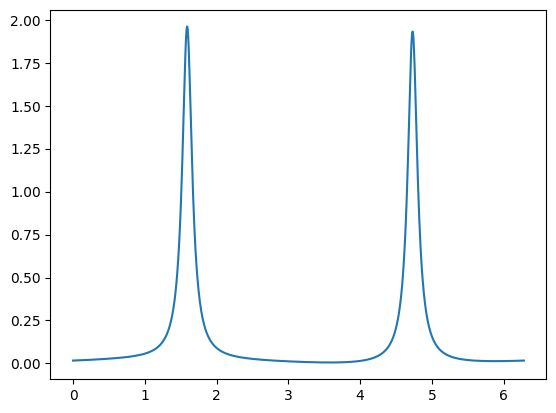

In [26]:
plt.plot(x,f_sym(x,-0.8482478+0.03323253j).real+f_asym(x,0.013081328-0.045863595j).real)